In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/train.csv")
df.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
df = df[:1000]

In [5]:
df.shape

(1000, 3)

In [6]:
X = df[['question_text']]
y = df['target']

In [7]:
X.head()

,question_text
0,How did Quebec nationalists see their province...
1,"Do you have an adopted dog, how would you enco..."
2,Why does velocity affect time? Does velocity a...
3,How did Otto von Guericke used the Magdeburg h...
4,Can I convert montra helicon D to a mountain b...


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [9]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate our CountVectorizer.
cvec = CountVectorizer(max_features = 500, stop_words = 'english')

In [10]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['question_text']).todense(),
                          columns = cvec.get_feature_names())

In [11]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(X_test['question_text']).todense(),
                         columns = cvec.get_feature_names())

In [12]:
X_train_cvec.head()

,10,100,11,2017,2018,30,able,access,account,act,...,women,work,working,world,worth,write,writing,wwii,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Import our model!

from sklearn.naive_bayes import MultinomialNB

#Fitting the vectorizer on the training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['question_text']).todense(), columns = cvec.get_feature_names())

#Transform test data
X_test_cvec = pd.DataFrame(cvec.transform(X_test['question_text']).todense(), columns = cvec.get_feature_names())

X_train_cvec.head()

,10,100,11,2017,2018,30,able,access,account,act,...,women,work,working,world,worth,write,writing,wwii,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train_cvec.index = y_train

In [15]:
X_train_cvec.loc[1].head()

,10,100,11,2017,2018,30,able,access,account,act,...,women,work,working,world,worth,write,writing,wwii,year,years
target,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Graphs of the 20 Most-Common Words

In [16]:
top_features_sincere = X_train_cvec.loc[0].sum().sort_values(ascending = False)[:20]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

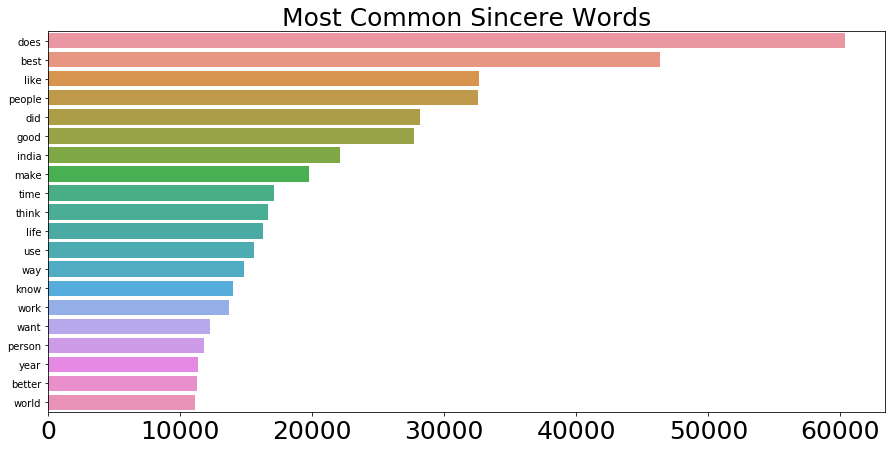

In [93]:
plt.figure(figsize =(15, 7))
plt.title('Most Common Sincere Words', fontsize=25)
plt.xticks(fontsize = 25)
sns.barplot(top_features_sincere.values, top_features_sincere.index);

In [94]:
top_features_insincere = X_train_cvec.loc[1].sum().sort_values(ascending = False)[:20]

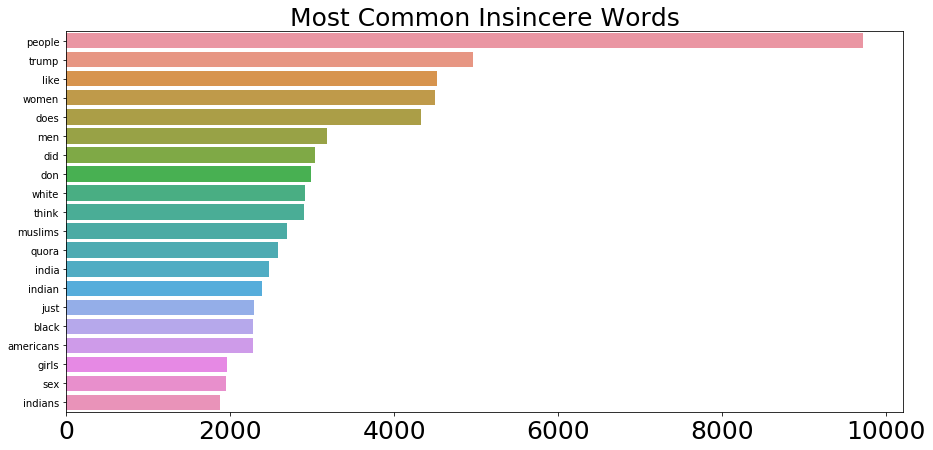

In [95]:
plt.figure(figsize =(15, 7))
plt.title('Most Common Insincere Words', fontsize=25)
plt.xticks(fontsize = 25)
sns.barplot(top_features_insincere.values, top_features_insincere.index);

In [18]:
# Instantiate our model.

nb = MultinomialNB()

In [19]:
# Fit our model.

model = nb.fit(X_train_cvec, y_train)

In [20]:
# Generate our predictions.

predictions = model.predict(X_test_cvec)

In [21]:
# Score our model on the training set.

model.score(X_train_cvec, y_train)

0.9786666666666667

In [22]:
from sklearn.model_selection import cross_val_score

Double check to make sure there's not a ton of overlap.

In [23]:
cross_val_score(model, X_train_cvec, y_train, cv=5).mean()

0.9399810361942013

In [24]:
# Score our model on the testing set.

model.score(X_test_cvec, y_test)

0.948

In [25]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [26]:
# Generate a confusion matrix.

confusion_matrix(y_test, predictions)

array([[236,   2],
       [ 11,   1]])

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [28]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 236
False Positives: 2
False Negatives: 11
True Positives: 1


In [29]:
accuracy = (tp + tn)/(tn+fp+fn+tp)
print("Accuracy: %s" % accuracy)
precision = tp/(tp+fp)
print("Precision: %s" % precision)
recall = tp/(tp+fn)
print("Recall: %s" % recall)
f1_score = (precision*recall)/(precision+recall)
print("F1 Score: %s" % f1_score)

Accuracy: 0.948
Precision: 0.3333333333333333
Recall: 0.08333333333333333
F1 Score: 0.06666666666666667
